In [3]:
import pandas as pd
import geopandas
import geodatasets

# Data acquisition

In [53]:
colombia = geopandas.read_file(geodatasets.get_path('geoda.malaria'))
geopandas.options.display_precision = 2
print(colombia.shape)
colombia.head(3)

(1068, 51)


,ID,ADM0,ADM1,ADM2,CODDEPT,IDDANE,DANECODE,TP1973,UP1973,RP1973,...,TP2003,UP2003,RP2003,TP2004,UP2004,RP2004,TP2005,UP2005,RP2005,geometry
0,1,COLOMBIA,Guajira,URIBIA,44,44847,44847,57815,2881,54934,...,67709,6682,61027,68458,7053,61405,69203,7430,61773,"POLYGON ((-71.33 11.85, -71.34 11.86, -71.35 1..."
1,2,COLOMBIA,Guajira,MANAURE,44,44560,44560,5661,4074,1587,...,42371,8548,33823,44229,9096,35133,46134,9669,36465,"POLYGON ((-72.42 11.80, -72.42 11.80, -72.41 1..."
2,3,COLOMBIA,Guajira,MAICAO,44,44430,44430,36771,25161,11610,...,140121,122435,17686,144277,126249,18028,148517,130149,18368,"POLYGON ((-72.19 11.52, -72.18 11.53, -72.17 1..."


In [45]:
colombia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
colombia['ADM0'].value_counts(dropna = False)

ADM0
COLOMBIA    1068
Name: count, dtype: int64

# Visualization

<Axes: >

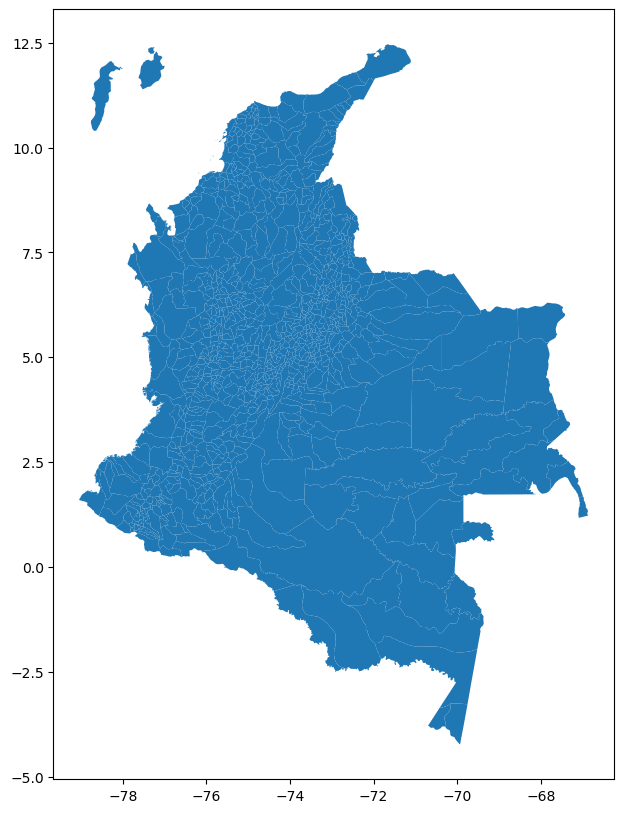

In [12]:
colombia.plot(markersize = 0.5, figsize = (10, 10))

In [13]:
colombia.geometry.name

'geometry'

## centroids

In [14]:
colombia.columns

Index(['ID', 'ADM0', 'ADM1', 'ADM2', 'CODDEPT', 'IDDANE', 'DANECODE', 'TP1973',
       'UP1973', 'RP1973', 'TP1985', 'UP1985', 'RP1985', 'TP1993', 'UP1993',
       'RP1993', 'MALARI98', 'TP1995', 'UP1995', 'RP1995', 'TP1996', 'UP1996',
       'RP1996', 'TP1997', 'UP1997', 'RP1997', 'TP1998', 'UP1998', 'RP1998',
       'TP1999', 'UP1999', 'RP1999', 'TP2000', 'UP2000', 'RP2000', 'TP2001',
       'UP2001', 'RP2001', 'TP2002', 'UP2002', 'RP2002', 'TP2003', 'UP2003',
       'RP2003', 'TP2004', 'UP2004', 'RP2004', 'TP2005', 'UP2005', 'RP2005',
       'geometry'],
      dtype='object')

In [33]:
colombia = colombia.rename_geometry('borders')
print(colombia.geometry.name)
colombia.columns

borders


Index(['ID', 'ADM0', 'ADM1', 'ADM2', 'CODDEPT', 'IDDANE', 'DANECODE', 'TP1973',
       'UP1973', 'RP1973', 'TP1985', 'UP1985', 'RP1985', 'TP1993', 'UP1993',
       'RP1993', 'MALARI98', 'TP1995', 'UP1995', 'RP1995', 'TP1996', 'UP1996',
       'RP1996', 'TP1997', 'UP1997', 'RP1997', 'TP1998', 'UP1998', 'RP1998',
       'TP1999', 'UP1999', 'RP1999', 'TP2000', 'UP2000', 'RP2000', 'TP2001',
       'UP2001', 'RP2001', 'TP2002', 'UP2002', 'RP2002', 'TP2003', 'UP2003',
       'RP2003', 'TP2004', 'UP2004', 'RP2004', 'TP2005', 'UP2005', 'RP2005',
       'borders', 'centroids'],
      dtype='object')

/tmp/ipykernel_9597/4163844846.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colombia['centroids'] = colombia.centroid


<Axes: >

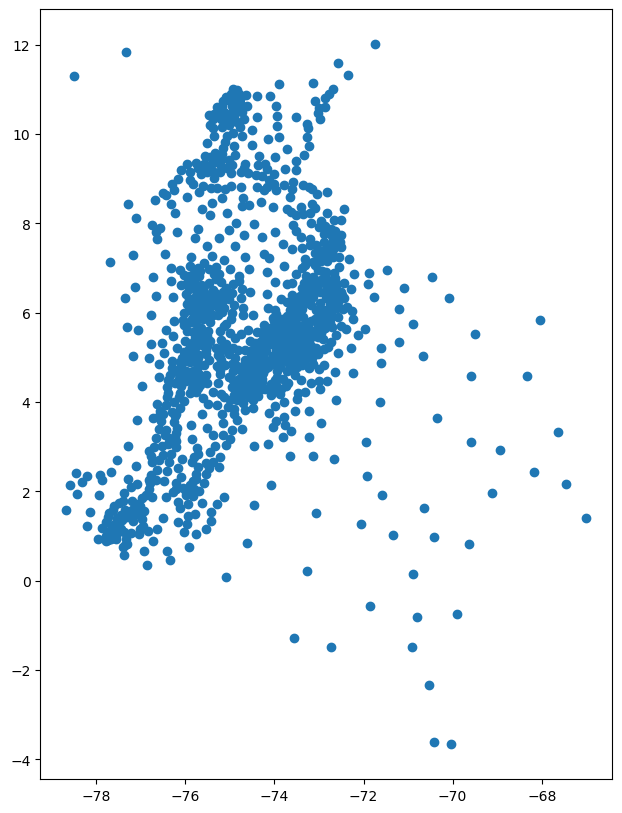

In [34]:
colombia['centroids'] = colombia.centroid
colombia['centroids'].plot(figsize = (10, 10))

In [35]:
colombia.rename(columns={'borders': 'new_active_g_name'}, inplace=True)
colombia.set_geometry('new_active_g_name', inplace = True)
colombia.columns

Index(['ID', 'ADM0', 'ADM1', 'ADM2', 'CODDEPT', 'IDDANE', 'DANECODE', 'TP1973',
       'UP1973', 'RP1973', 'TP1985', 'UP1985', 'RP1985', 'TP1993', 'UP1993',
       'RP1993', 'MALARI98', 'TP1995', 'UP1995', 'RP1995', 'TP1996', 'UP1996',
       'RP1996', 'TP1997', 'UP1997', 'RP1997', 'TP1998', 'UP1998', 'RP1998',
       'TP1999', 'UP1999', 'RP1999', 'TP2000', 'UP2000', 'RP2000', 'TP2001',
       'UP2001', 'RP2001', 'TP2002', 'UP2002', 'RP2002', 'TP2003', 'UP2003',
       'RP2003', 'TP2004', 'UP2004', 'RP2004', 'TP2005', 'UP2005', 'RP2005',
       'new_active_g_name', 'centroids'],
      dtype='object')

<Axes: >

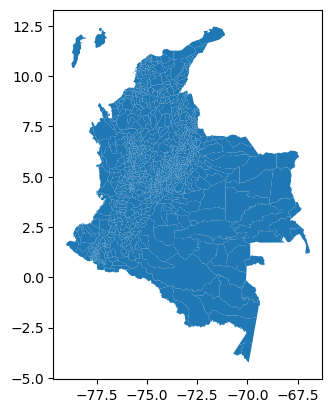

In [36]:
colombia.geometry.plot()

In [37]:
colombia.rename(columns={'new_active_g_name': 'borders'}, inplace=True)
colombia.set_geometry('borders', inplace = True)
colombia.columns

Index(['ID', 'ADM0', 'ADM1', 'ADM2', 'CODDEPT', 'IDDANE', 'DANECODE', 'TP1973',
       'UP1973', 'RP1973', 'TP1985', 'UP1985', 'RP1985', 'TP1993', 'UP1993',
       'RP1993', 'MALARI98', 'TP1995', 'UP1995', 'RP1995', 'TP1996', 'UP1996',
       'RP1996', 'TP1997', 'UP1997', 'RP1997', 'TP1998', 'UP1998', 'RP1998',
       'TP1999', 'UP1999', 'RP1999', 'TP2000', 'UP2000', 'RP2000', 'TP2001',
       'UP2001', 'RP2001', 'TP2002', 'UP2002', 'RP2002', 'TP2003', 'UP2003',
       'RP2003', 'TP2004', 'UP2004', 'RP2004', 'TP2005', 'UP2005', 'RP2005',
       'borders', 'centroids'],
      dtype='object')

In [39]:
geopandas.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.
  use_pygeos: False [default: False]
      Whether to use PyGEOS to speed up spatial operations. The default is
      True if PyGEOS is installed, and follows the USE_PYGEOS environment
      variable if set.
  )